![WoMa](http://astro.dur.ac.uk/~cklv53/woma_logo.png "WoMa")
 <a id="top"></a>

# Welcome to WoMa

This tutorial notebook covers the main features of WoMa. Let's get started!

Also see the `README.md` for more documentation.

## Contents:
[1.](#1_spherical_profiles) Spherical profiles

[2.](#2_spinning_profiles) Spinning profiles

[3.](#3_particles) Particle placement

[4.](#4_impact_initial_conditions) (Bonus) Impact initial conditions

#### Quick notes
We refer to the bodies as "planets" but these methods can be applied to anything in hydrostatic equilibrium.

See [Ruiz-Bonilla et al. 2020](https://arxiv.org/abs/2007.02965) for the full descriptions of the methods.

Most WoMa functions take an optional `verbosity` argument that controls the amount of printed information. Set `0` for no printing, `1` for standard output, or `2` for extra details.

Arrays in WoMa are explicitly labelled with a prefix `A1_`, or `An_` for an `n`-dimensional array.

Further developments and extensions to WoMa are actively ongoing, so do let us know if there is a feature you would like, or of course if you find any bugs!

---

 <a id="1_spherical_profiles"></a>

 ## 1. Spherical profiles

First let's import WoMa, set some constants, and make a simple plotting function to display the planets we create:

In [1]:
import woma
import matplotlib.pyplot as plt

R_earth = 6.371e6   # m
M_earth = 5.9724e24  # kg m^-3 

def plot_spherical_profiles(planet):    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0, 0].plot(planet.A1_r / R_earth, planet.A1_rho)
    ax[0, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0, 0].set_yscale("log")
    ax[0, 0].set_xlim(0, None)
    
    ax[1, 0].plot(planet.A1_r / R_earth, planet.A1_m_enc / M_earth)
    ax[1, 0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 0].set_ylabel(r"Enclosed Mass, $M_{<r}$ $[M_\oplus]$")
    ax[1, 0].set_xlim(0, None)
    ax[1, 0].set_ylim(0, None)
    
    ax[0, 1].plot(planet.A1_r / R_earth, planet.A1_P)
    ax[0, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0, 1].set_ylabel(r"Pressure, $P$ [Pa]")
    ax[0, 1].set_yscale("log")
    ax[0, 1].set_xlim(0, None)
    
    ax[1, 1].plot(planet.A1_r / R_earth, planet.A1_T)
    ax[1, 1].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[1, 1].set_ylabel(r"Temperature, $T$ [K]")
    ax[1, 1].set_xlim(0, None)
    ax[1, 1].set_ylim(0, None)
    
    plt.tight_layout()
    plt.show()

### 1.1 One-layer planets

Let's start by building a simple, spherical, 1 layer planet.

WoMa provides many options for which inputs you provide and which are calculated. We'll cover other options later, or see the `README.md` for the full documentation.

For any planet we want to build, we need to specify:
- The equation of state (EoS) for every material: e.g. Tillotson basalt. 
- A temperature--density relation for every material: e.g. adiabatic, a power-law $T\propto\rho^\alpha$ ($\alpha=0$ for isothermal), or a fixed specific entropy.
- The temperature $T_{\rm s}$ and either the pressure $P_{\rm s}$ or density $\rho_{\rm s}$ at the surface of the planet. e.g. $P_{\rm s}=10^5\, \rm Pa$ and $T_{\rm s}=500\, \rm K$. For a fixed-entropy relation, only $\rho_{\rm s}$ is needed.

In [2]:
planet = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=2"],
    P_s             = 1e5,
    T_s             = 500,
)

For spherical 1 layer planets we can specify either the total radius `R` or the total mass `M` of the planet, then WoMa will find the value for the other such that we get a valid planet in hydrostatic equilibrium.

Let's set our planet's radius to $1~R_\oplus$. (We could have set this along with the other parameters in the previous cell.)

In [3]:
planet.R = R_earth

We now select the appropiate method to make the planet profiles.

In this case, we are generating (`gen_prof`) a one layer planet (`L1`) and need to find the mass (`find_M`) for our chosen radius (`given_R`). This function also needs a rough value for the maximum mass `M_max`, let's say a generous $2~M_\oplus$.

In [4]:
planet.gen_prof_L1_find_M_given_R(M_max=2 * M_earth)

Iter 25(40): M=0.68394M_E: tol=8.7e-08(1e-07)    
Planet "my_first_planet": 
    M            = 4.0848e+24  kg  = 0.68394  M_earth
    R            = 6.371e+06  m  = 1  R_earth
    mat          = ["Til_basalt"] 
    mat_id       = [103] 
    T_rho_type   = ["power=2"] 
    R_layer      = [1]  R_earth
    M_layer      = [0.68394]  M_earth
    M_frac_layer = [1]  M_tot
    idx_layer    = [999] 
    P_s          = 1e+05  Pa
    T_s          = 500  K
    rho_s        = 2484.5  kg m^-3
    P_0          = 1.0471e+11  Pa
    T_0          = 2140.5  K
    rho_0        = 5140.6  kg m^-3
    I_MR2        = 0.36842  M_tot*R_tot^2


We can see from the printed output (or by printing `planet.M`) that the mass of our planet is about $\tfrac{2}{3}~M_\oplus$, along with other information.

Let's plot the resulting profiles:

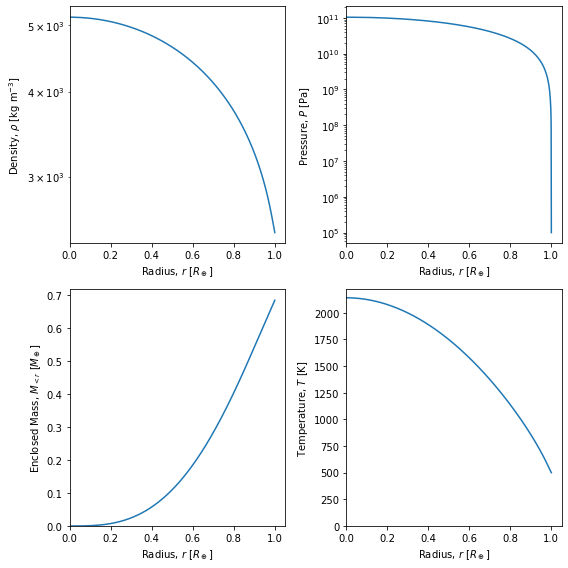

In [5]:
plot_spherical_profiles(planet)

As mentioned above, we could instead set the total mass `M` to derive the radius. 

Let's also try an isothermal temperature relation.

Iter 11(40): R=1.0928R_E: tol=0.00089(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "my_second_planet": 
    M            = 5.9651e+24  kg  = 0.99877  M_earth
    R            = 6.9621e+06  m  = 1.0928  R_earth
    mat          = ["Til_basalt"] 
    mat_id       = [103] 
    T_rho_type   = ["power=0"] 
    R_layer      = [1.0928]  R_earth
    M_layer      = [0.99877]  M_earth
    M_frac_layer = [1]  M_tot
    idx_layer    = [999] 
    P_s          = 1e+05  Pa
    T_s          = 500  K
    rho_s        = 2484.5  kg m^-3
    P_0          = 1.6256e+11  Pa
    T_0          = 500  K
    rho_0        = 5970.5  kg m^-3
    I_MR2        = 0.36343  M_tot*R_tot^2


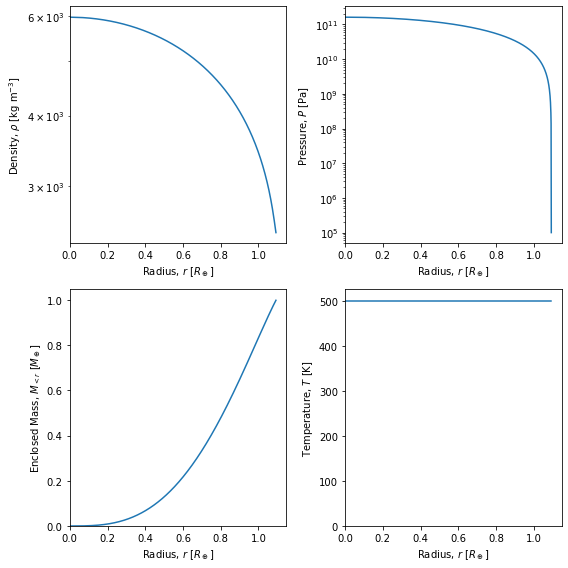

In [6]:
planet = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ["Til_basalt"],
    A1_T_rho_type   = ["power=0"],
    P_s             = 1e5,
    T_s             = 500,
    M               = M_earth,
)

# Generate the profiles
planet.gen_prof_L1_find_R_given_M(R_max=2 * R_earth)

# Plot the results
plot_spherical_profiles(planet)

### 1.2 Two-layer planets

Let's move on to make some 2 layer planets. 

We'll also try some more realistic ANEOS equations of state for an Earth-like core and mantle, with adiabatic temperature--density relations, the inner one at a chosen specific entropy:

In [7]:
planet = woma.Planet(
    name            = "hello_world",
    A1_mat_layer    = ["ANEOS_Fe85Si15", "ANEOS_forsterite"],
    A1_T_rho_type   = ["entropy=1500", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
)

For 2 layer planets we have more options for which properties of our planet we choose and which unknowns are derived. 

For example, we can set the total mass `M` and radius `R`, and get WoMa to find the boundary radius. (We could have set these along with the other parameters in the previous cell.)

Iter 11(40): R1=0.58447R_E: tol=0.00083(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "hello_world": 
    M            = 5.97e+24  kg  = 0.9996  M_earth
    R            = 6.371e+06  m  = 1  R_earth
    mat          = ["ANEOS_Fe85Si15", "ANEOS_forsterite"] 
    mat_id       = [402, 400] 
    T_rho_type   = ["entropy=1500", "adiabatic"] 
    R_layer      = [0.58358, 1]  R_earth
    M_layer      = [0.40592, 0.59368]  M_earth
    M_frac_layer = [0.40608, 0.59392]  M_tot
    idx_layer    = [583, 999] 
    P_s          = 1e+05  Pa
    T_s          = 1000  K
    rho_s        = 3164.4  kg m^-3
    P_1          = 1.1914e+11  Pa
    T_1          = 2872.5  K
    rho_1        = 10022  kg m^-3
    P_0          = 3.9047e+11  Pa
    T_0          = 4040.6  K
    rho_0        = 12873  kg m^-3
    I_MR2        = 0.31978  M_tot*R_tot^2


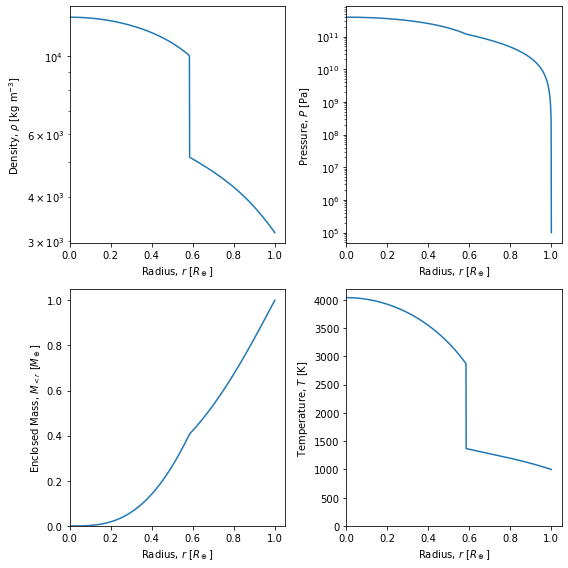

In [8]:
planet.M = M_earth
planet.R = R_earth

# Generate the profiles
planet.gen_prof_L2_find_R1_given_M_R()

# Plot the results
plot_spherical_profiles(planet)

Or, we could set the masses of each layer, `A1_M_layer`, and get WoMa to find the radii of the boundary and the outer edge. As before, we also need to give minimum and maximum radii.

Let's try a random mix of SESAME and Tillotson materials with an adiabatic mantle and a power-law core:

Trying to build a planet with R=R_min... Success
Trying to build a planet with R=R_max... Success
Iter 10(40): R=1.0126R_E R1=0.4994R_E: tol=0.00097(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "None": 
    M            = 5.9648e+24  kg  = 0.99872  M_earth
    R            = 6.4516e+06  m  = 1.0126  R_earth
    mat          = ["Til_iron", "SESAME_basalt"] 
    mat_id       = [100, 301] 
    T_rho_type   = ["power=0.5", "adiabatic"] 
    R_layer      = [0.49872, 1.0126]  R_earth
    M_layer      = [0.29869, 0.70003]  M_earth
    M_frac_layer = [0.29907, 0.70093]  M_tot
    idx_layer    = [492, 999] 
    P_s          = 1e+05  Pa
    T_s          = 1000  K
    rho_s        = 2868  kg m^-3
    P_1          = 1.5348e+11  Pa
    T_1          = 1875.2  K
    rho_1        = 11766  kg m^-3
    P_0          = 4.3096e+11  Pa
    T_0          = 2140.9  K
    rho_0        = 15335  kg m^-3
    I_MR2        = 0.31804  M_tot*R_tot^2


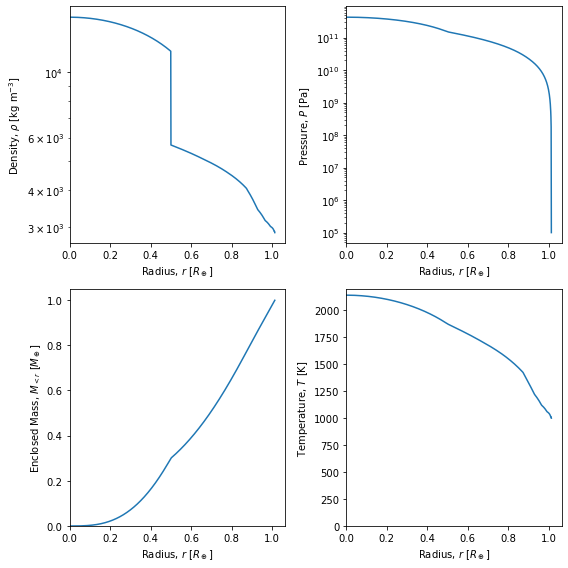

In [9]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "SESAME_basalt"],
    A1_T_rho_type   = ["power=0.5", "adiabatic"],
    P_s             = 1e5,
    T_s             = 1000,
    A1_M_layer      = [0.3 * M_earth, 0.7 * M_earth],
)

# Generate the profiles
planet.gen_prof_L2_find_R_R1_given_M1_M2(R_min=0.9 * R_earth, R_max=1.05 * R_earth)

# Plot the results
plot_spherical_profiles(planet)

### 1.3 Three-layer planets

With 3 layers there are a huge number of possible inputs and unknowns, several but not all of which are available in WoMa. Some of these require repeated iterations over multiple variables, so can take several minutes.

Further developments are actively ongoing, so if you have a particular choice of parameters that you'd like to set and/or determine then please let us know! You can of course do the iterations yourself, systematically varying an input to a WoMa function until you get the output you need.

For example, let's create an ice giant by setting the total mass and the radii at the base and top of the atmosphere.

Iter 12(40): R1=1.2766R_E: tol=0.00057(0.001)  
Tweaking M to avoid density peaks at the center of the planet... Done
Planet "None": 
    M            = 8.6795e+25  kg  = 14.533  M_earth
    R            = 2.5484e+07  m  = 4  R_earth
    mat          = ["HM80_rock", "HM80_ice", "HM80_HHe"] 
    mat_id       = [202, 201, 200] 
    T_rho_type   = ["power=0", "power=0.9", "adiabatic"] 
    R_layer      = [1.2773, 2.999, 4]  R_earth
    M_layer      = [3.8499, 9.7816, 0.90121]  M_earth
    M_frac_layer = [0.26491, 0.67307, 0.062013]  M_tot
    idx_layer    = [319, 749, 999] 
    P_s          = 1e+05  Pa
    T_s          = 70  K
    rho_s        = 0.34426  kg m^-3
    P_2          = 1.216e+10  Pa
    T_2          = 2823.4  K
    rho_2        = 931.06  kg m^-3
    P_1          = 5.243e+11  Pa
    T_1          = 9943.4  K
    rho_1        = 8420.5  kg m^-3
    P_0          = 1.6694e+12  Pa
    T_0          = 9943.4  K
    rho_0        = 12729  kg m^-3
    I_MR2        = 0.18075  M_tot*R_tot^2

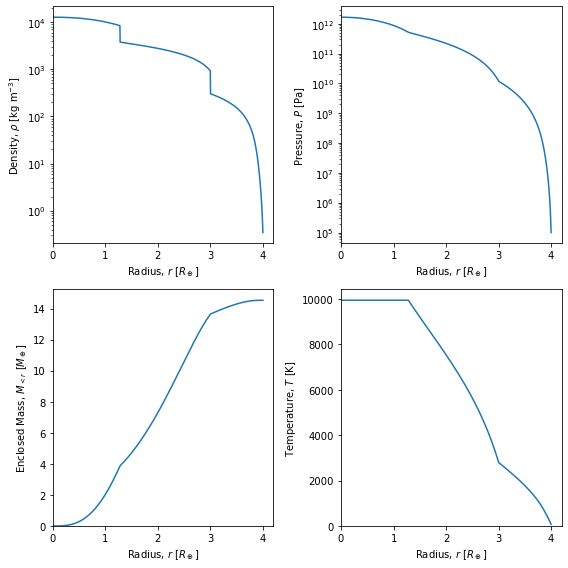

In [10]:
planet = woma.Planet(
    A1_mat_layer    = ["HM80_rock", "HM80_ice", "HM80_HHe"],
    A1_T_rho_type   = ["power=0", "power=0.9", "adiabatic"],
    P_s             = 1e5,
    T_s             = 70,
    M               = 14.5 * M_earth,
    A1_R_layer      = [None, 3 * R_earth, 4 * R_earth],
)

# Generate the profiles
planet.gen_prof_L3_find_R1_given_M_R_R2()

# Plot the results
plot_spherical_profiles(planet)

Let's make one final Earth-like (ish) planet and add a thick atmosphere on top of the inner two layers.

The atmosphere's mass will depend primarily on the pressure at its base, so we need to keep that in mind when we make the inner two-layer planet first, for which we'll set the masses of each layer and let WoMa find the radii.

We also need to set the minimum density and/or pressure at which our atmosphere will stop, since in this case the third layer profiles are integrated outwards.

Planet "None": 
    M            = 5.9737e+24  kg  = 1.0002  M_earth
    R            = 7.2521e+06  m  = 1.1383  R_earth
    mat          = ["Til_iron", "Til_basalt", "HM80_HHe"] 
    mat_id       = [100, 103, 200] 
    T_rho_type   = ["power=2", "power=2"] 
    R_layer      = [0.5126, 1.0559, 1.1383]  R_earth
    M_layer      = [0.29954, 0.69978, 0.00090538]  M_earth
    M_frac_layer = [0.29947, 0.69962, 0.00090517]  M_tot
    idx_layer    = [485, 999, 1077] 
    P_s          = 2.6635e+07  Pa
    T_s          = 693.16  K
    rho_s        = 10.13  kg m^-3
    P_2          = 1e+08  Pa
    T_2          = 1000  K
    rho_2        = 2281.3  kg m^-3
    P_1          = 1.3474e+11  Pa
    T_1          = 5206.9  K
    rho_1        = 10873  kg m^-3
    P_0          = 3.846e+11  Pa
    T_0          = 8817.7  K
    rho_0        = 14149  kg m^-3
    I_MR2        = 0.27039  M_tot*R_tot^2


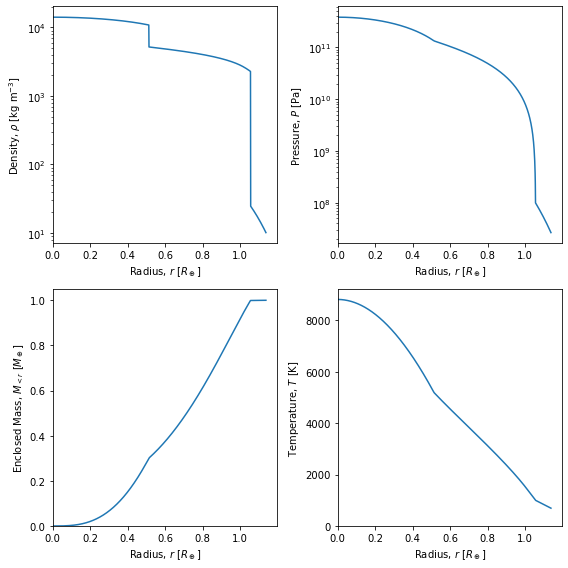

In [11]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    A1_M_layer      = [0.3 * M_earth, 0.7 * M_earth],
    P_s             = 1e8,
    T_s             = 1000,
)

# Generate the profiles
planet.gen_prof_L2_find_R_R1_given_M1_M2(
    R_min=0.9 * R_earth, R_max=1.1 * R_earth, verbosity=0
)

# Generate the new layer on top
planet.gen_prof_given_inner_prof(
    mat         = "HM80_HHe", 
    T_rho_type  = "adiabatic", 
    rho_min     = 10, 
    P_min       = 0,
)

# Plot the results
plot_spherical_profiles(planet)

---

 <a id="2_spinning_profiles"></a>

[Back to Contents](#top)

## 2. Spinning profiles

As described in [Ruiz-Bonilla et al. 2020](...), a spinning body can be modelled as a system of thin, concentric spheroids of constant density.

First, like we did for the spherical profiles, let's import WoMa, set some constants, and make a simple plotting function to display the planets we create.

In [12]:
import woma
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

R_earth = 6.371e6   # m
M_earth = 5.9724e24  # kg m^-3 

def plot_spinning_profiles(sp):    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
        
    ax[0].plot(sp.planet.A1_r / R_earth, sp.planet.A1_rho, label="original spherical")
    ax[0].plot(sp.A1_R / R_earth, sp.A1_rho, label="equatorial")
    ax[0].plot(sp.A1_Z / R_earth, sp.A1_rho, label="polar")
    ax[0].set_xlabel(r"Radius, $r$ $[R_\oplus]$")
    ax[0].set_ylabel(r"Density, $\rho$ [kg m$^{-3}$]")
    ax[0].set_yscale("log")
    ax[0].set_xlim(0, 1.1 * sp.R_eq / R_earth)
    ax[0].legend()
    
    for i, e in enumerate([
        Ellipse(
            xy=[0, 0],
            width=2 * sp.A1_R[i] / R_earth, 
            height=2 * sp.A1_Z[i] / R_earth,
            zorder=-i,
        )
        for i in range(len(sp.A1_R))
    ]):
        ax[1].add_artist(e)
        e.set_clip_box(ax[1].bbox)
        e.set_facecolor(plt.get_cmap("viridis")(
            (sp.A1_rho[i] - sp.rho_s) / (sp.rho_0 - sp.rho_s)
        ))
    
    ax[1].set_xlabel(r"Equatorial Radius, $r_{xy}$ $[R_\oplus]$")
    ax[1].set_ylabel(r"Polar Radius, $z$ $[R_\oplus]$")    
    ax[1].set_xlim(0, 1.1 * sp.R_eq / R_earth)
    ax[1].set_ylim(0, 1.1 * sp.R_po / R_earth)
    ax[1].set_aspect("equal")
    ax[1].set_title(r"Density [kg m$^{-3}$]")
    
    plt.tight_layout()
    plt.show()

To construct a spheroidal planet in WoMa we start from a spherical profile. Let's remake one of the simple 2 layer examples from the previous section as our input.

In [13]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R               = R_earth,
)

# Generate the profiles
planet.gen_prof_L2_find_R1_given_M_R(verbosity=0)

We now use the `SpinPlanet` class and pass it the spherical planet with the period we want. Note the period is set in units of hours.

Let's try a very rapid rotation for our Earth-like planet with a period of 4 hours.

By default, the resulting total mass of our spinning planet is fixed to be the same as the input spherical planet. This does require some extra iteration over the faster base method, so if you don't need to keep the total mass precisely constant then set `fix_mass=False`.

In [14]:
spin_planet = woma.SpinPlanet(
    planet = planet,
    period = 4, # h
)

Iter 1(15),1(30): R0=0.6006R_E R1=0.995R_E: tol=0.054(0.01), 0.081(0.01)
Iter 1(15),2(30): R0=0.6005R_E R1=0.99R_E: tol=0.051(0.01), 0.056(0.01)
Iter 1(15),3(30): R0=0.6005R_E R1=0.985R_E: tol=0.047(0.01), 0.035(0.01)
Iter 1(15),4(30): R0=0.6004R_E R1=0.98R_E: tol=0.044(0.01), 0.0095(0.01)
Iter 1(15),16(30): R0=0.594R_E R1=0.98R_E: tol=0.01(0.01), 0.022(0.01)
Iter 1(15),17(30): R0=0.589R_E R1=0.98R_E: tol=-0.022(0.01), 0.029(0.01)
Iter 1(15),18(30): R0=0.593R_E R1=0.98R_E: tol=0.008(0.01), 0.015(0.01)
Iter 2(15),1(30): R0=0.5934R_E R1=0.975R_E: tol=0.0036(0.01), -0.0063(0.01)

SpinPlanet "None": 
    planet       = "None"
    period       = 4  h
    M            = 5.9581e+24  kg  = 0.99761  M_earth
    R_eq         = 6.658e+06  m  = 1.045  R_earth
    R_po         = 5.9539e+06  m  = 0.93453  R_earth
    mat          = ["Til_iron", "Til_basalt"] 
    mat_id       = [100, 103] 
    R_layer      = [0.62262, 1.045]  R_earth
    Z_layer      = [0.57298, 0.93384]  R_earth
    M_layer      = 

Let's plot the resulting profiles using the spheroid data arrays:

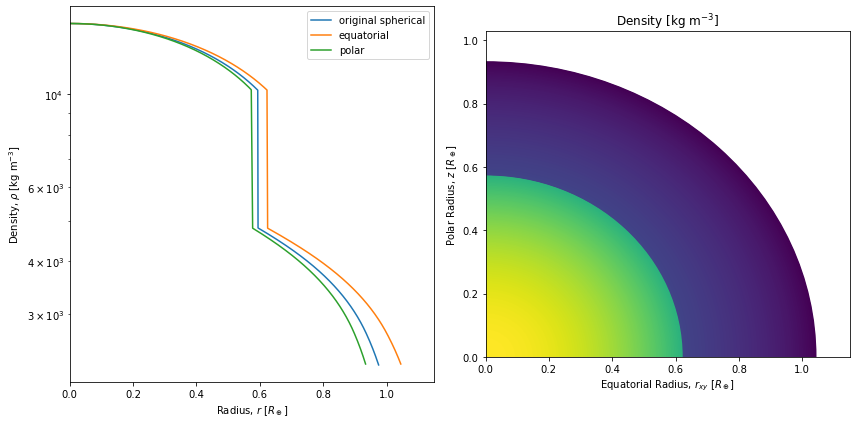

In [15]:
plot_spinning_profiles(spin_planet)

---

 <a id="3_particles"></a>

[Back to Contents](#top)

## 3. Particle placement (e.g. for SPH) 

Creating particle representations with WoMa is done in the same way for spinning and spherical planets.

For spherical profiles, we use the fast SEA algorithm ([Kegerreis et al. 2019](https://doi.org/10.1093/mnras/stz1606)) to place particles to precisely match the profile densities. 

For spinning profiles, we use a modified version of SEA as described in [Ruiz-Bonilla et al. 2020](...).

The particles' other properties (e.g. temperature, material type) all match the input profiles too, with ~equal mass for all particles. The concentric shells of particles also align automatically with any material and surface boundaries in the profiles.

Further documentation and examples for the [SEAGen](https://pypi.org/project/seagen/) python package are available at [github.com/jkeger/seagen](https://github.com/jkeger/seagen).

Try `verbosity=1` or `2` for more information as well.

In [16]:
import woma

R_earth = 6.371e6   # m
M_earth = 5.972e24  # kg m^-3 

Let's start with a simple 2 layer spherical planet like we did above, then create two versions with sets of $10^4$ and $10^6$ particles:

In [17]:
planet = woma.Planet(
    A1_mat_layer    = ["Til_iron", "Til_basalt"],
    A1_T_rho_type   = ["power=2", "power=2"],
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R               = R_earth,
)

# Generate the profiles
planet.gen_prof_L2_find_R1_given_M_R(verbosity=0)

In [18]:
# Create the sets of particles
particles_low_res = woma.ParticlePlanet(planet, 1e4, verbosity=0)

particles_high_res = woma.ParticlePlanet(planet, 1e6, verbosity=0)

We can now print, save, or do whatever we like with the particle data. 

See the `ParticlePlanet` class docstring in `woma/main.py` for the full output documentation.

For example, let's just print the position, mass, density, and temperature of the 123$^{\rm rd}$ particle:

In [19]:
print(particles_high_res.A2_pos[122] / R_earth, "R_earth")
print(particles_high_res.A1_m[122] / M_earth, "M_earth")
print(particles_high_res.A1_rho[122], "kg m^-3")
print(particles_high_res.A1_T[122], "K")

[-0.03723253 -0.00912056  0.01178097] R_earth
1.0020364488218328e-06 M_earth
14990.907970901575 kg m^-3
9787.097684677092 K


Note that the resulting number of particles may be slightly different from our input value. 

This is a consequence of needing to place integer numbers of particles in each shell, combined with the particle-mass tweaking required to align the particle shells with the profile boundaries.

In [20]:
print("%.3e" % particles_low_res.N_particles)
print("%.3e" % particles_high_res.N_particles)

1.285e+04
9.954e+05


For a smoothed particle hydrodynamics (SPH) simulation, we can also input the number of neighbours for a quick and crude estimate of each particle's smoothing length from its density.

In [21]:
particles_low_res = woma.ParticlePlanet(planet, 1e4, N_ngb=48, verbosity=0)

print(particles_low_res.A1_h[122] / R_earth, "R_earth")

0.055950880935349195 R_earth


Everything works the same for a spinning planet.

Let's give our example planet a familiar rotation period, then place particles as before.

In [22]:
spin_planet = woma.SpinPlanet(
    planet      = planet,
    period      = 24,  # h
    verbosity   = 0,
)

In [23]:
particles = woma.ParticlePlanet(spin_planet, 1e5, N_ngb=48)

print(particles.A2_pos[122] / R_earth, "R_earth")

Creating spheroidal shell 37/37
[0.00346406 0.05904066 0.06152163] R_earth


Finally, we can save the particle data to an HDF5 file, using the same format as the open-source simulation code SWIFT (www.swiftsim.com):
```python
particles.save("particles.hdf5")
```
See the `save()` method's docstring and  `save_particle_data()` in `woma/misc/io.py` for more details.

---

 <a id="4_impact_initial_conditions"></a>

[Back to Contents](#top)

## 4. Impact initial conditions

One of the motivations for WoMa's development was to create initial conditions for the modelling of planetary giant impacts. (Check out the open-source SWIFT code at www.swiftsim.com and see e.g. [icc.dur.ac.uk/giant_impacts/](http://icc.dur.ac.uk/giant_impacts/) for more info about these applications.)

Therefore, we include here some simple utilities for setting up the initial conditions for an impact scenario between two planets, as described in Appendix A of [Kegerreis et al. (2020)](iopscience.iop.org/article/10.3847/1538-4357/ab9810). See `impact_pos_vel_b_v_c_r()` and `impact_pos_vel_b_v_c_t()` in `woma/misc/utils.py` for the full documentation.

Note that while the particles placed by WoMa and SEAGen should be close to equilibrium for use in a simulation, it is recommended that you run a short "relaxation" simulation to allow any final settling to take place. In the case of standard SPH, particles at the density discontinuities of the outer surface and any interior boundaries will have incorrect smoothed densities and pressures. This can put the planet out of equilibrium even if the particles matched the input profiles perfectly.

In [24]:
import woma
import numpy as np

R_earth = 6.371e6   # m
M_earth = 5.9724e24  # kg m^-3 
G = 6.67408e-11  # m^3 kg^-1 s^-2

Let's assume we have our sets of prepared target and impactor particles, and now need to give them the correct initial positions and velocities for e.g. a canonical Moon-forming impact scenario.

We'll set the speed at contact to be the mutual escape speed, and an impact angle of 45 degrees, starting in the rest frame of the target at the origin.

In [25]:
# Example masses and radii of the target and impactor
M_t = 0.887 * M_earth
M_i = 0.133 * M_earth
R_t = 0.96 * R_earth
R_i = 0.57 * R_earth

# Mutual escape speed
v_esc = np.sqrt(2 * G * (M_t + M_i) / (R_t + R_i))

# Initial position and velocity of the target
A1_pos_t = np.array([0., 0., 0.])
A1_vel_t = np.array([0., 0., 0.])

We can specify either an initial separation of the body centres or a time before impact. 

The default input units are the dimensionless impact parameter, b = sin(B) where B is the impact angle, and the speed at contact, v_c, in m/s. Or we can choose to input the impact angle in degrees and the speed in terms of the mutual escape speed.

In [26]:
# Initial position and velocity of the impactor

# Set initial separation of 4 Earth radii
# Default inputs: dimensionless impact parameter and SI speed
A1_pos_i, A1_vel_i = woma.impact_pos_vel_b_v_c_r(
    b       = np.sin(45 * np.pi/180), 
    v_c     = v_esc, 
    r       = 4 * R_earth, 
    R_t     = R_t, 
    R_i     = R_i, 
    M_t     = M_t, 
    M_i     = M_i,
)

print(A1_pos_i / R_earth, "R_earth")
print(A1_vel_i, "m/s")

[3.97131216 0.47820466 0.        ] R_earth
[-5338.83575898  1845.28423541     0.        ] m/s


In [27]:
# Set time until contact of 1 hour
# Instead: impact angle in degrees and speed in units of the escape speed
A1_pos_i, A1_vel_i = woma.impact_pos_vel_b_v_c_t(
    b           = 45,
    v_c         = 1, 
    t           = 3600, 
    R_t         = R_t, 
    R_i         = R_i, 
    M_t         = M_t, 
    M_i         = M_i,
    units_b     = "B", 
    units_v_c   = "v_esc",
)

print(A1_pos_i / R_earth, "R_earth")
print(A1_vel_i, "m/s")

[4.66467412 0.22397545 0.        ] R_earth
[-4876.47578654  1884.17128417     0.        ] m/s


These functions automatically rotate the coordinates such that the velocity at contact is in the negative x direction, which is simply a common aesthetic choice.

We might prefer to run a simulation in the centre-of-mass and zero-momentum frame, so let's translate the positions and velocities accordingly:

In [28]:
# Centre of mass
A1_pos_com = (M_t * A1_pos_t + M_i * A1_pos_i) / (M_t + M_i)
A1_pos_t -= A1_pos_com
A1_pos_i -= A1_pos_com

# Centre of momentum
A1_vel_com = (M_t * A1_vel_t + M_i * A1_vel_i) / (M_t + M_i)
A1_vel_t -= A1_vel_com
A1_vel_i -= A1_vel_com

print(A1_pos_t / R_earth, "R_earth")
print(A1_vel_t, "m/s")
print(A1_pos_i / R_earth, "R_earth")
print(A1_vel_i, "m/s")

[-0.60823692 -0.02920464  0.        ] R_earth
[ 635.8541957  -245.68115764    0.        ] m/s
[4.0564372  0.19477081 0.        ] R_earth
[-4240.62159084  1638.49012653     0.        ] m/s


These positions and velocities can now be added to all of the particles in our two planets to give the initial conditions for the impact simulation.

It is usually worth first running a relaxation simulation with each planet in isolation to allow any final settling to occur and to double check your initial conditions, before then combining the particles.
```python
target.A2_pos += A1_pos_t
target.A2_vel[:] = A1_vel_t

impactor.A2_pos += A1_pos_i
impactor.A2_vel[:] = A1_vel_i
```

We can then save the particles to an HDF5 file, using the same format as SWIFT. 

If the simulation box has 0,0,0 in the corner rather than the centre, then we can pass the size of the box, e.g. 100 Earth radii, to shift the origin to the centre.

We might also want to use a different units system for the file instead of the default SI, e.g. Earth masses, Earth radii, and seconds. 
```python
import h5py
with h5py.File("initial_conditions.hdf5", "w") as f:
    woma.save_particle_data(
        f,
        np.append(target.A2_pos, impactor.A2_pos, axis=0),
        np.append(target.A2_vel, impactor.A2_vel, axis=0),
        np.append(target.A1_m, impactor.A1_m),
        np.append(target.A1_h, impactor.A1_h),
        np.append(target.A1_rho, impactor.A1_rho),
        np.append(target.A1_P, impactor.A1_P),
        np.append(target.A1_u, impactor.A1_u),
        np.append(target.A1_mat_id, impactor.A1_mat_id),
        boxsize=100 * R_earth,
        file_to_SI=woma.Conversions(M_earth, R_earth, 1),
    )
```
See `save_particle_data()` in `woma/misc/io.py` and `Conversions` in `woma/misc/utils.py` for details.

---

Thank you for trying WoMa! We hope you find it useful and any feedback would be greatly appreciated.

---

[Back to Contents](#top)